<a href="https://colab.research.google.com/github/NeroCube/kaggle-titanic/blob/master/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic Datasets for Machine Learning
從本機上傳測試資料

In [55]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from functools import partial


uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train (5).csv
User uploaded file "train.csv" with length 61194 bytes


顯示前五筆資料

In [16]:
column_types={'PassengerId':'category',
                'Survived':'category',
                'Pclass':int,
                'Name':'category',
                'Sex':'category',
                'Age':float,
                'SibSp':int,
                'Parch':int,
                'Fare':float,
                'Cabin':'category',
                'Embarked':'category',}

data = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')), dtype=column_types)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


查看資料欄位資訊

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null category
Survived       891 non-null category
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null category
Embarked       889 non-null category
dtypes: category(6), float64(2), int64(3), object(1)
memory usage: 150.0+ KB


查看描述性統計

In [18]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,891,2,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,99,0,NaN,"van Melkebeke, Mr. Philemon",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,1,549,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,NaN,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,NaN,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


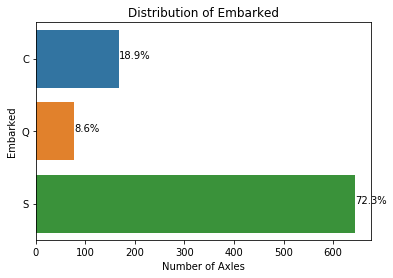

In [31]:
ax = sns.countplot(y="Embarked", data=data)
plt.title('Distribution of Embarked')
plt.xlabel('Number of Axles')

total = len(data['Embarked'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

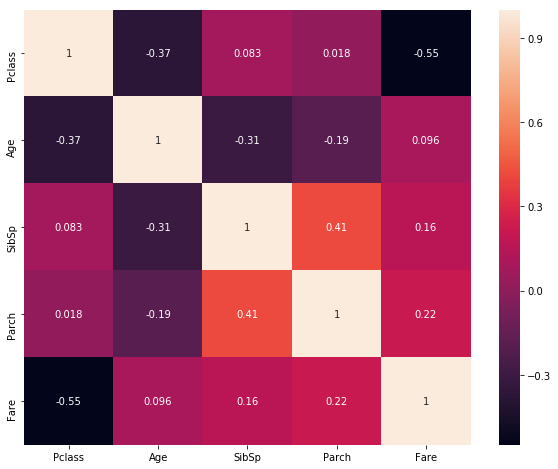

In [33]:
plt.figure(figsize=(10, 8))
feature_corr = data.corr()
sns.heatmap(feature_corr, annot=True)

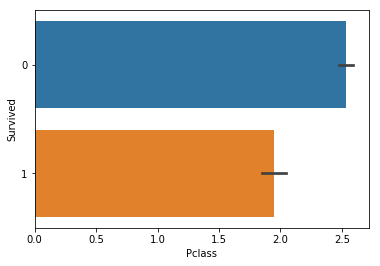

In [34]:
sns.barplot('Pclass','Survived', data=data)

查看缺值情況

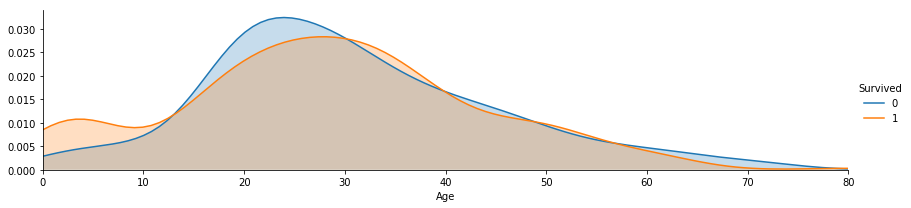

In [41]:
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
 
plt.show()

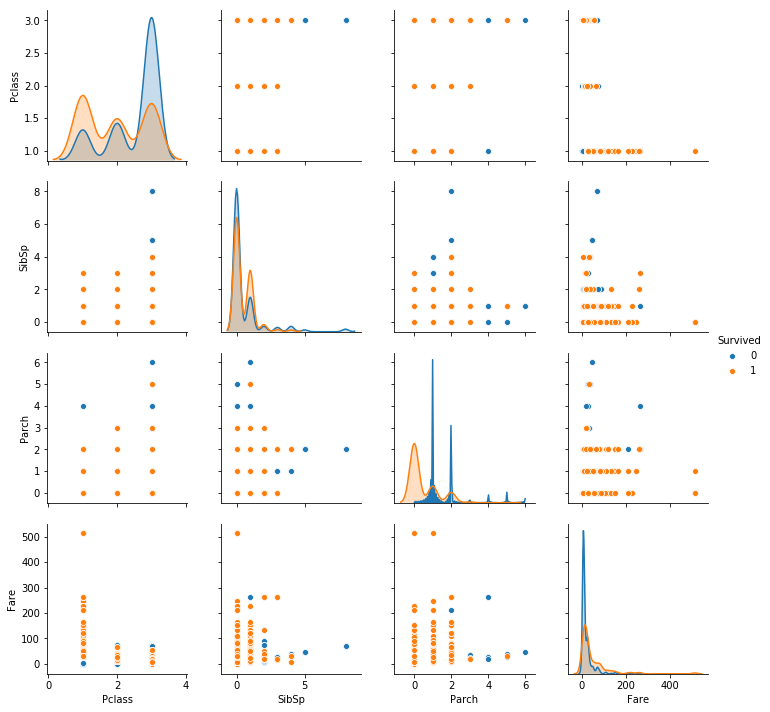

In [51]:
vars = ['Pclass', 'SibSp', 'Parch', 'Fare']
sns.pairplot(data, vars=vars, hue='Survived')

比對生存以及死亡的乘客在各表徵的數量

In [52]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

缺值處理

In [0]:
#對dataframe丟棄指定欄位
def drop_col(df, col):
    return df.drop([col], axis=1)
#將丟棄欄位參數定為缺值過多的Cabin
drop_cabin_col = partial(drop_col,
                         col='Cabin')

#對dataframe特定欄位以總體算術平均數做補值
def fillna_with_mean(df, col):
    df[col] = df[col].fillna(df[col].mean())
    return df
#特定欄位參數設為Age
age_fillna_with_mean = partial(fillna_with_mean, 
                               col='Age')

#特定欄位參數設為fare
fare_fillna_with_mean = partial(fillna_with_mean, 
                               col='Fare')

#對dataframe特定欄位以最常出現的值做為補值
def fillna_with_most_freq_val(df, col):
    most_freq_val = df[col].value_counts().index[0]
    df[col] = df[col].fillna(most_freq_val)
    return df
#欄位定為Embarked
embarked_fillna_with_most_freq_val = partial(fillna_with_most_freq_val,
                                             col='Embarked')

def apply(Funclist, df):
    if len(Funclist) > 0:
        return apply(Funclist[1:], Funclist[0](df))
    else:
        return df

#train set的資料處理流程
train_processing_steps = [drop_cabin_col,
                          age_fillna_with_mean, 
                          embarked_fillna_with_most_freq_val]

train_set = apply(train_processing_steps, data)

缺值處理後各欄位狀態

In [61]:
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

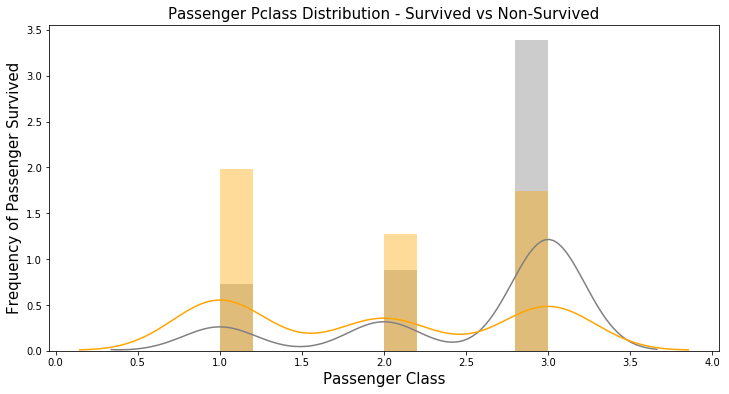

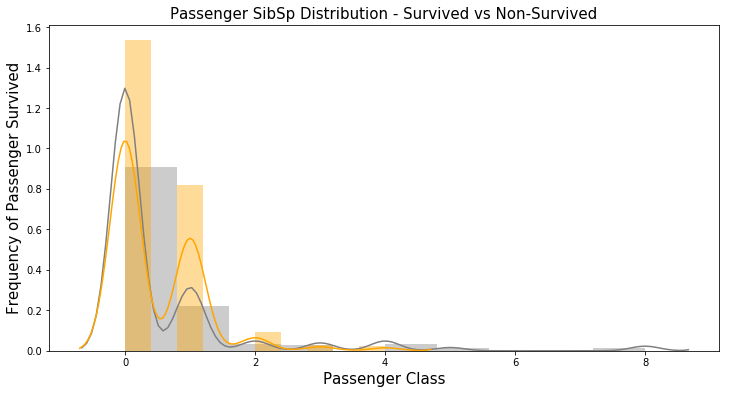

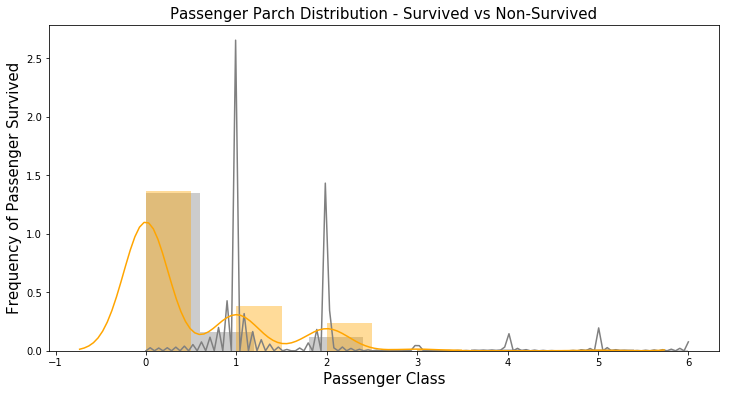

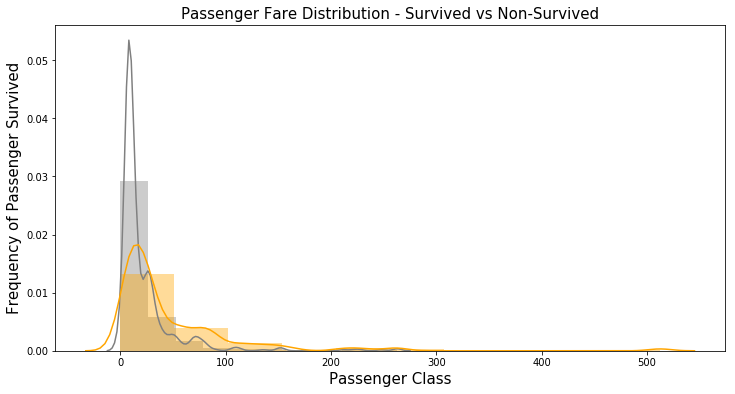

In [72]:
for col in ['Pclass', 'SibSp', 'Parch', 'Fare']:

    fig = plt.figure(figsize=(12,6),)
    sns.distplot(data[data.Survived == '0'][col],
                 bins=10,
                 color='gray',
                 label='not survived',
                 kde=True)

    sns.distplot(data[data.Survived == '1'][col],
                 bins=10,
                 color='orange',
                 label='survived',
                 kde=True)

    plt.title('Passenger {} Distribution - Survived vs Non-Survived'.format(col), fontsize = 15)
    plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
    plt.xlabel("Passenger Class", fontsize = 15)